In [2]:
import pandas as pd 
path='C:/Users/zhouwei/Desktop/jobs_4k.xls'
data=pd.read_excel(path)
postion_name=data['positionName'].tolist()
skills_labels=data['skillLables'].tolist()
from collections import defaultdict
skill_position_graph=defaultdict(list)
for p,s in zip(postion_name,skills_labels):
    skill_position_graph[p]+=eval(s)
print(skill_position_graph)

defaultdict(<class 'list'>, {'财务产品经理': ['产品设计', '后台', 'B2B'], '产品专家': ['产品设计', '产品策划', '业务流程管理', '战略管理', '领导力', 'OKR管理', '产品设计'], '产品总监': ['电商', '社交电商', '产品策划', '需求分析', '用户研究', '交互设计', '商业产品', '移动产品/APP', '在线教育产品', '产品设计', '用户研究', '教育', '目标管理', 'OKR管理', '领导力', '团队建设', '企业软件', '数据', 'ERP', '功能产品', '部门管理', '业务流程管理', '团队建设', 'OKR管理', '产品设计', '教育', '社交/SNS', '数据分析', '产品设计', '教育', '社交/SNS', '数据分析', '创业', '部门管理', '领导力', '团队建设', '部门管理', '产品设计', '产品设计', '产品策划', '需求分析', '项目管理', '产品设计', '移动产品/APP', '产品设计', '移动产品/APP', '产品设计', '产品策划', '移动产品/APP', '产品设计', '需求分析', '项目管理', '后台产品', 'B2C', '用户研究', '产品设计', '项目管理', '需求分析', '产品策划', '产品设计', '产品设计', '产品设计', '项目管理', '移动产品/APP', '数据分析', '用户增长', '产品设计', '产品设计', '电商', '产品设计', '产品设计', '产品策划', '用户研究', '需求分析', '交互设计', '产品策划', '产品设计', '金融', '产品设计', '金融', '产品策划', '用户研究', '需求分析', '项目管理', '金融', '产品设计', '策略', '企业软件', 'B端产品', '产品设计', '需求分析', '商业产品', '产品设计', '产品策划', '结构设计', '交互设计', '商业产品', '需求分析', '移动产品/APP', '产品设计', '产品策划', '企业软件', '需求分析', '产品设计', '产品策划', '人工智能', '智能硬件

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G=nx.DiGraph(skill_position_graph)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [5]:
import random
sample=random.sample(postion_name,k=3)
connection=sample
for p, skills in skill_position_graph.items():
    if p in sample:
        connection+=skills

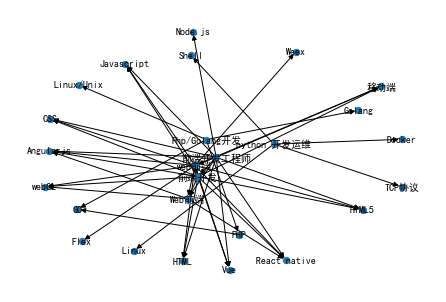

In [6]:
sample_graph=G.subgraph(connection)
pos=nx.spring_layout(sample_graph,k=1)
nx.draw(sample_graph,pos,with_labels=True,hold=False,node_size=40,font_size=10)
plt.show()

In [7]:
#pagerank，进行核心能力和核心职位进行排序
pr=nx.pagerank(G,alpha=0.9)
postion_and_ability=sorted([(name,value)for name,value in pr.items()],key=lambda x:x[1],reverse=False)

In [8]:
#输入技能点，进行预测工资
x=data.drop(['salary'],axis=1)
target=data['salary'].tolist()
string_train=[]
print(x)
#将字符串进行拼接
x['merged']=x.apply(lambda x:"".join(str(x)),axis=1)

        id         positionName district stationname jobNature  \
0        3               财务产品经理      海淀区          上地        全职   
1        4                 产品专家      海淀区         中关村        全职   
2        5                 产品总监      海淀区         中关村        全职   
3        6  联盟广告产品运营专家/专员-【商业化】      海淀区          东单        全职   
4        7                 产品总监      海淀区         中关村        全职   
...    ...                  ...      ...         ...       ...   
4506  4509                ui设计师      朝阳区        北苑路北        全职   
4507  4510              高级ui设计师      朝阳区        None        全职   
4508  4511              高级UI设计师      海淀区         西小口        全职   
4509  4512              高级UI设计师      海淀区         西小口        全职   
4510  4513              游戏UI设计师      东城区         灯市口        全职   

                      companyLabelList industryField companySize  \
0     ['节日礼物', '年底双薪', '定期体检', '七险一金']    物流丨运输,软件开发   500-2000人   
1     ['五险一金', '弹性工作', '带薪年假', '免费两餐']          企业服务   500-2000人   
2  

In [17]:
x_string=x['merged'].tolist()
x_string[1].split('\n')

['id                                                                 4',
 'positionName                                                    产品专家',
 'district                                                         海淀区',
 'stationname                                                      中关村',
 'jobNature                                                         全职',
 "companyLabelList                    ['五险一金', '弹性工作', '带薪年假', '免费两餐']",
 'industryField                                                   企业服务',
 'companySize                                                500-2000人',
 'skillLables                                                       []',
 'createTime                                       2020-05-16 08:23:06',
 'companyFullName                                         北京拉勾网络技术有限公司',
 'workYear                                                       5-10年',
 'education                                                         本科',
 'positionAdvantage                                

In [63]:
import jieba 
import re
def get_one_row(x_string_row):
    job_string=''
    for i, element in enumerate(x_string_row.split('\n')):
        if len(element.split())==2:
            _,value=element.split()
            if i==0:continue
            job_string=job_string+value
    return job_string
def token(string):
    return re.findall('\w+',string)
cutted_x=[]
for i, row in enumerate(x_string):
    job_string=get_one_row(row)
    if i%1000==0:
        print(i)
    cutted_x.append(" ".join(jieba.cut(''.join(token(job_string)))))

0
1000
2000
3000
4000


In [64]:
type(cutted_x)


list

In [65]:
cutted_x[0]

'财务 产品 经理 海淀区 上 地 全职 物流 丨 运输 软件开发 5002000 人 北京 福佑 多多 信息技术 有限公司 13 年 本科 福利待遇 好 创业 黑马 技术 氛围 好 httpswwwlagoucomjobs7149613html 岗位职责 1 负责 财务 相关 业务 解决方案 架构 并 主导 与 产品 技术 等 交付 团队 的 对接 能够 从 完整 的 财务 产品线'

In [59]:
#使用TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
 
x=vec.fit_transform(cutted_x)

import numpy as np
target_num=[np.mean(list(map(float,re.findall('\d+',s))))for s in target]
y=target_num
#使用knn模型
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x,y)
def predict_by_label(test_string,model):
    test_words=jieba.cut(test_string)
    test_vec=vec.transform(test_words)
    predict_value=model.predict(test_vec)
    return predict_value[0]
test='BI 北京 0年 硕士'
predict_by_label(test,model)

<4511x9397 sparse matrix of type '<class 'numpy.float64'>'
	with 128866 stored elements in Compressed Sparse Row format>